In [11]:
import pandas as pd
import seaborn as sns

In [12]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error


In [13]:
print("1")

1


In [14]:
df = pd.read_csv("../data/hour.csv")


In [15]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


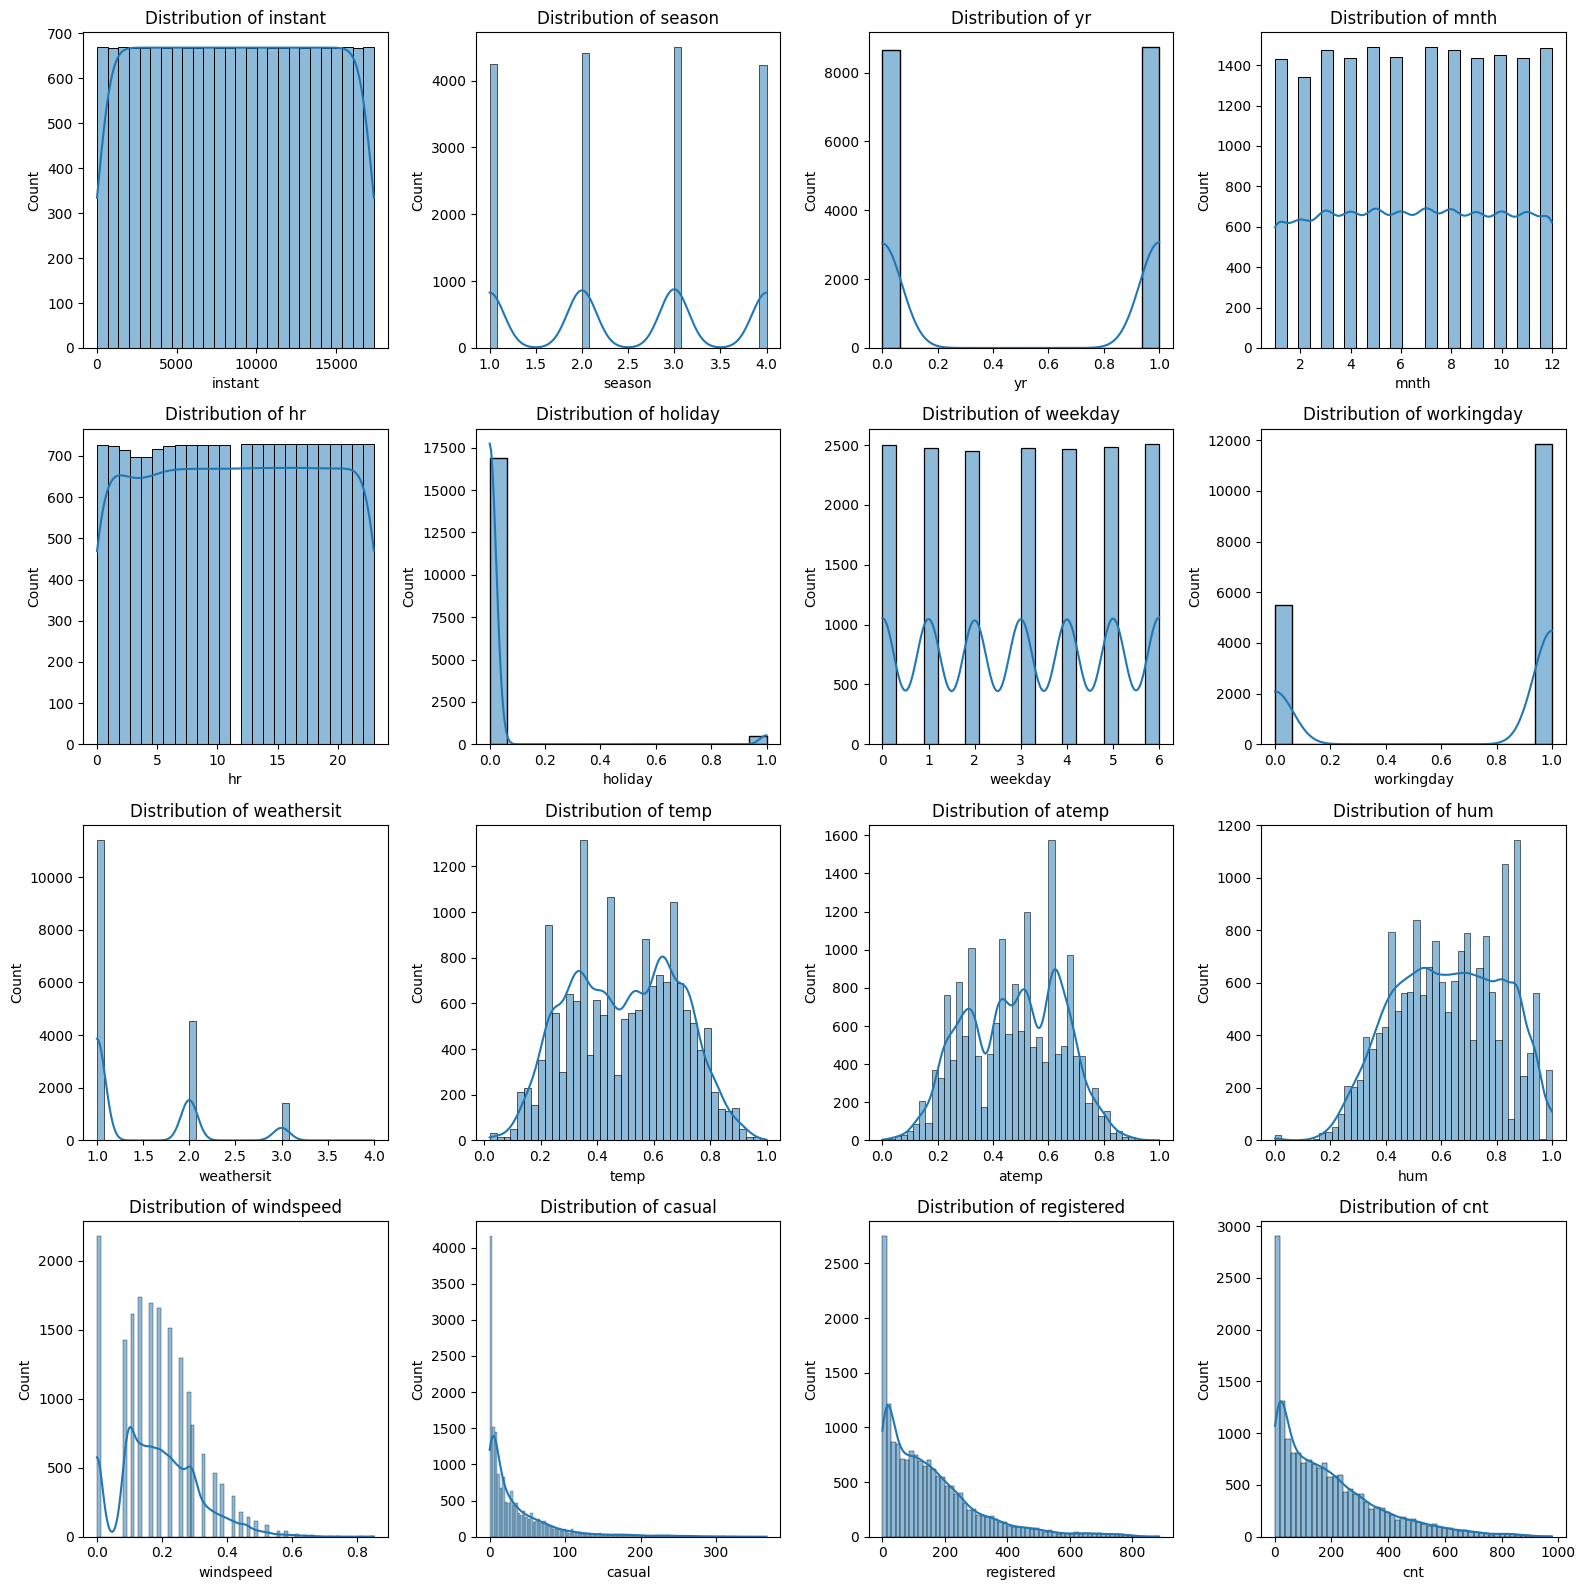

In [16]:
import matplotlib.pyplot as plt
import math

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 4  
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
for i in range(len(numeric_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


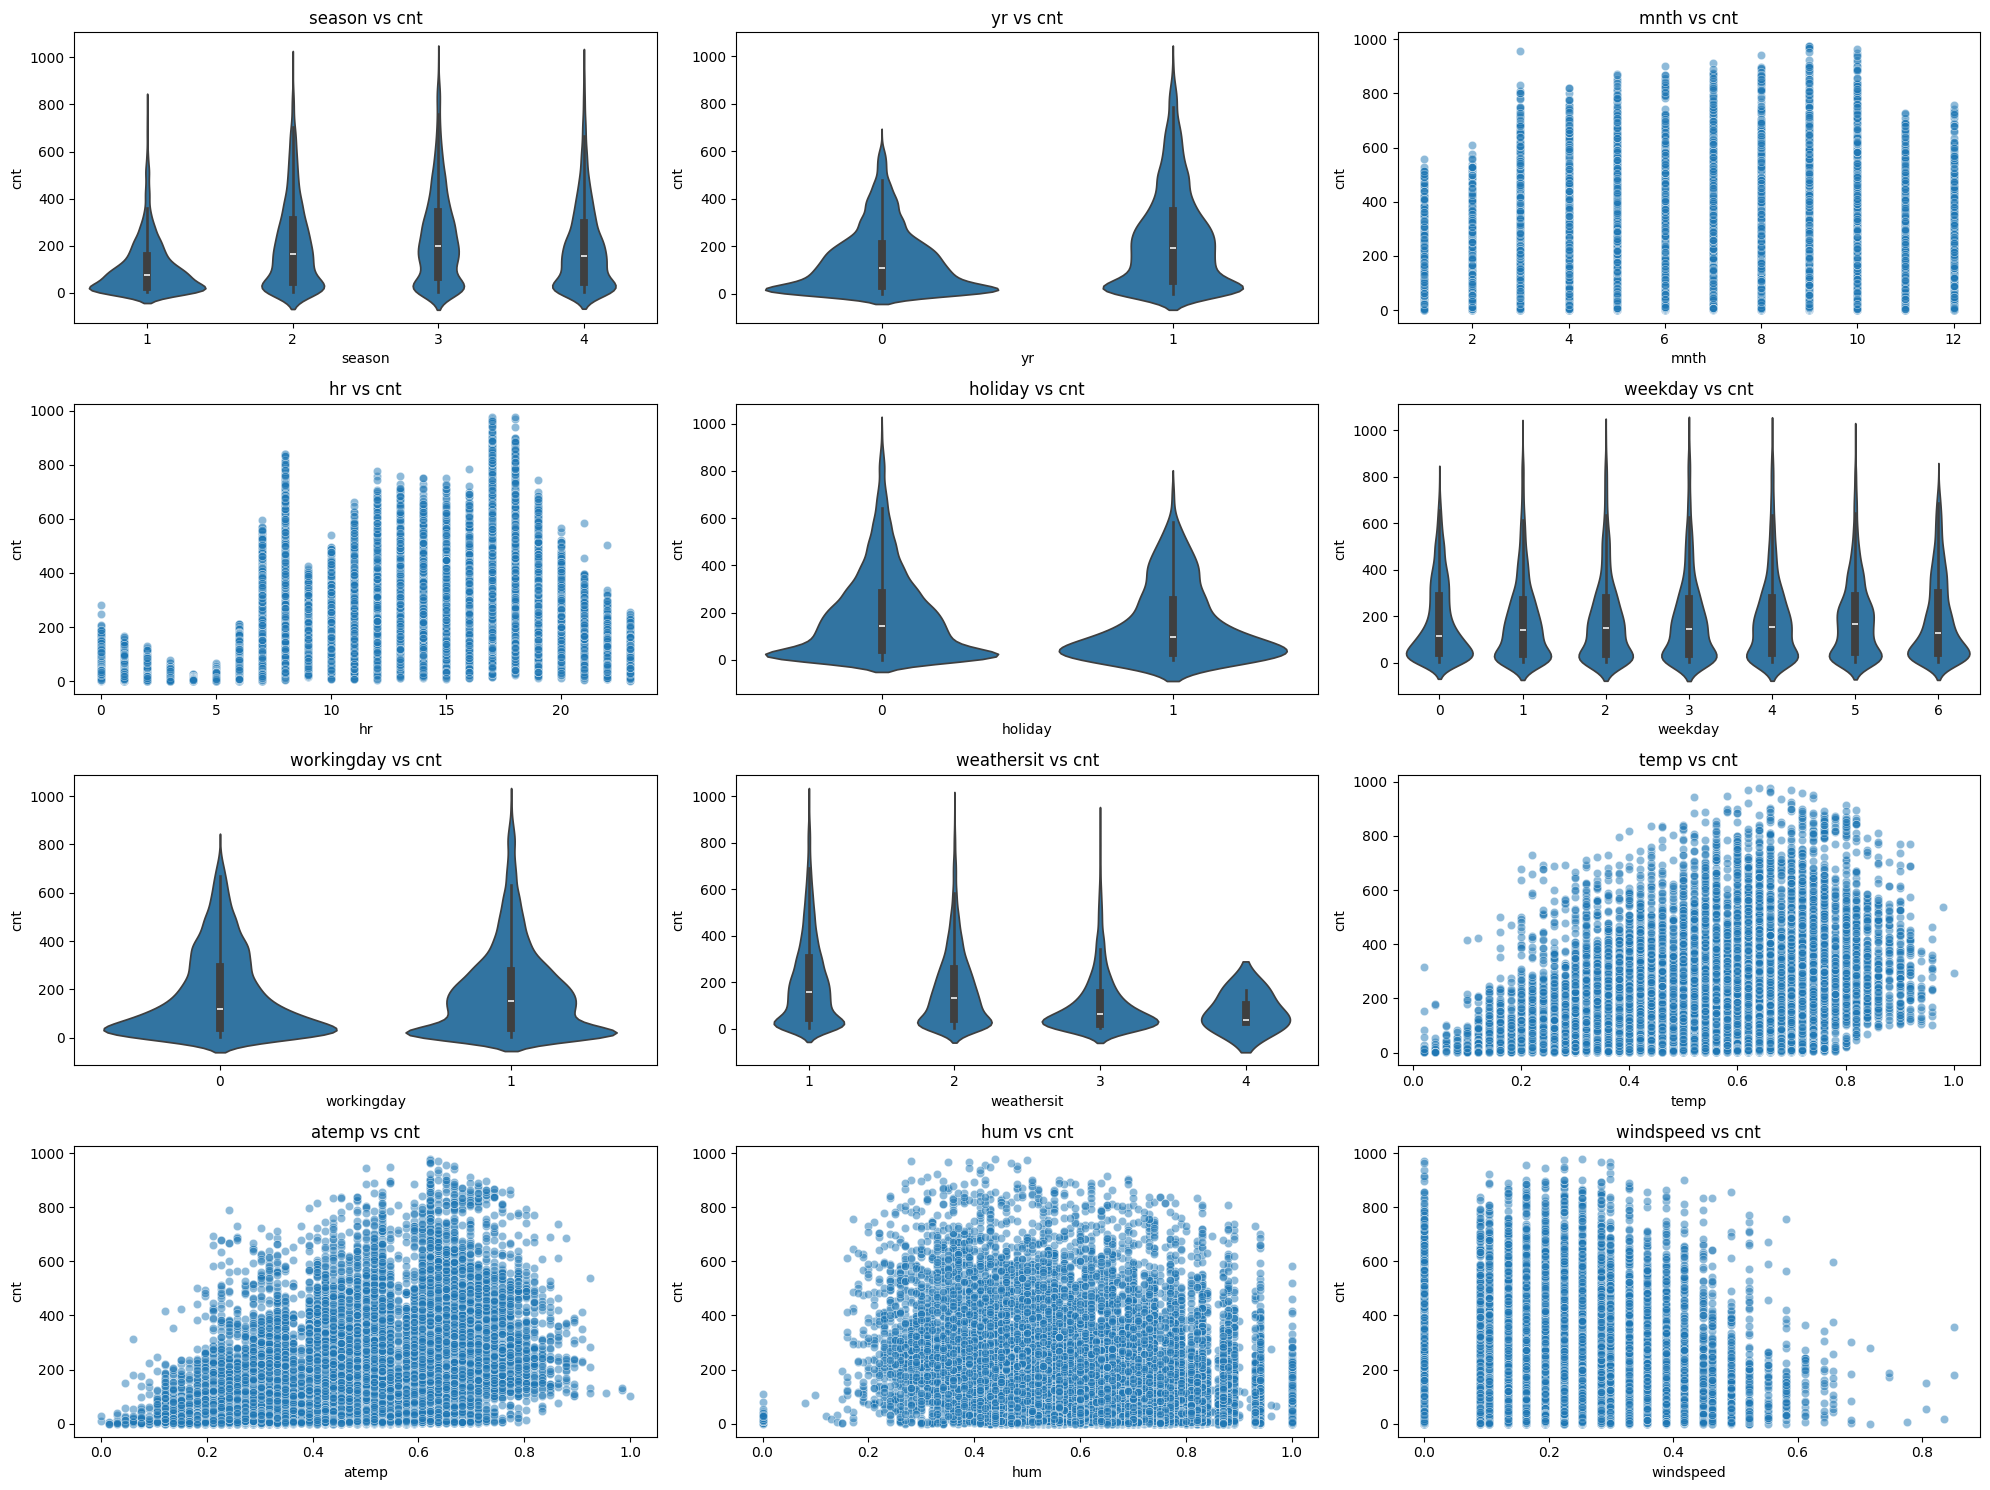

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

# List of feature columns to compare with cnt
columns_to_plot = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
                   'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

# Loop and plot each in a subplot
for idx, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, idx + 1)
    if df[col].nunique() < 10:
        # Categorical - use boxplot
        sns.violinplot(x=col, y='cnt', data=df)
    else:
        # Continuous - use scatterplot
        sns.scatterplot(x=col, y='cnt', data=df, alpha=0.5)
    plt.title(f'{col} vs cnt')

plt.tight_layout()
plt.show()


/var/folders/rf/2mp9s2ns50x98t5x01tvnt_w0000gp/T/ipykernel_41336/748400084.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


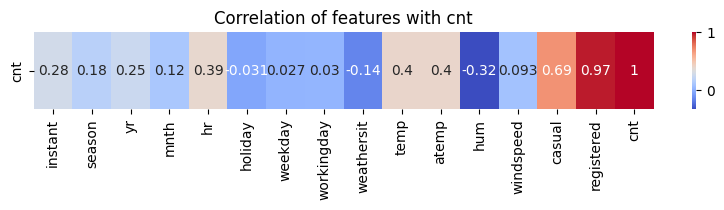

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap for correlation with 'cnt'
plt.figure(figsize=(10, 1))
sns.heatmap(corr_matrix[['cnt']].T, annot=True, cmap='coolwarm')
plt.title('Correlation of features with cnt')
plt.tight_layout()
plt.show()


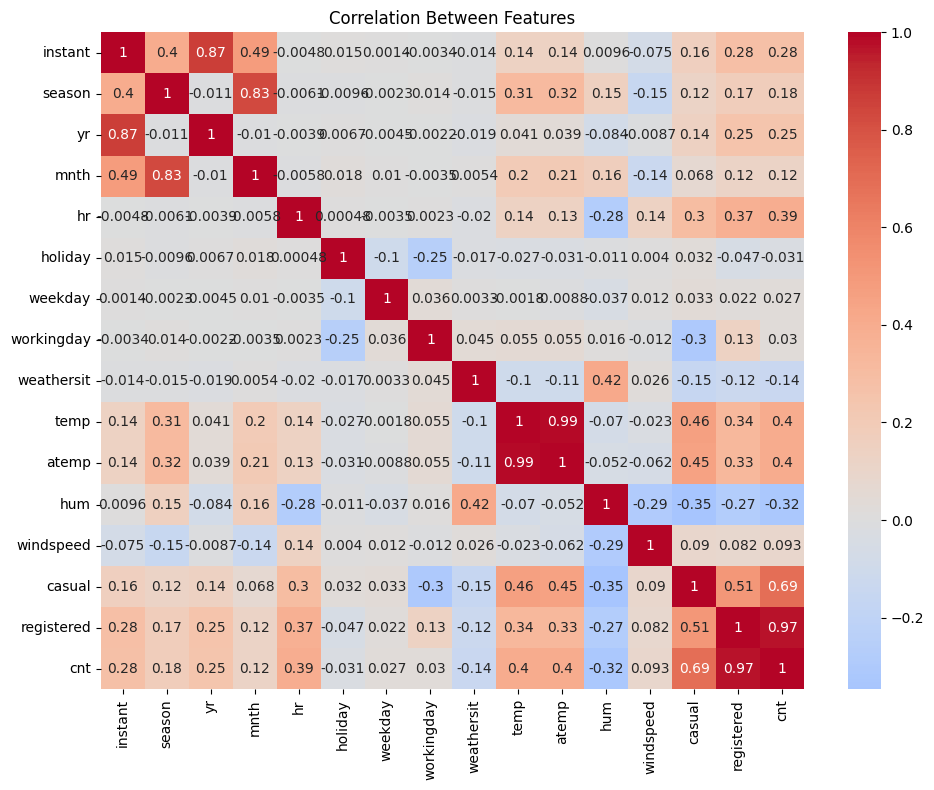

In [19]:
# Full heatmap (excluding target leakage columns)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()


In [20]:
cols_to_drop = ['registered', 'casual', 'dteday', 'atemp', 'weekday', 'workingday','mnth' , 'holiday', 'season']
df_cleaned = df.drop(columns=cols_to_drop)


In [21]:
df_cleaned

,instant,yr,hr,weathersit,temp,hum,windspeed,cnt
0,1,0,0,1,0.24,0.81,0.0000,16
1,2,0,1,1,0.22,0.80,0.0000,40
2,3,0,2,1,0.22,0.80,0.0000,32
3,4,0,3,1,0.24,0.75,0.0000,13
4,5,0,4,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...
17374,17375,1,19,2,0.26,0.60,0.1642,119
17375,17376,1,20,2,0.26,0.60,0.1642,89
17376,17377,1,21,1,0.26,0.60,0.1642,90
17377,17378,1,22,1,0.26,0.56,0.1343,61


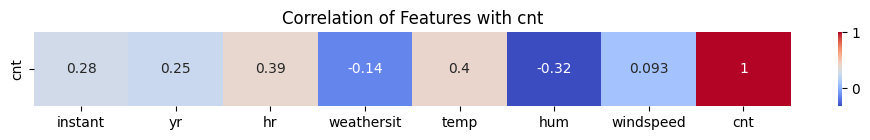

In [22]:

corr_matrix = df_cleaned.corr(numeric_only=True)

# Plot correlation of all features with 'cnt'
plt.figure(figsize=(10, 1.5))
sns.heatmap(corr_matrix[['cnt']].T, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with cnt')
plt.tight_layout()
plt.show()

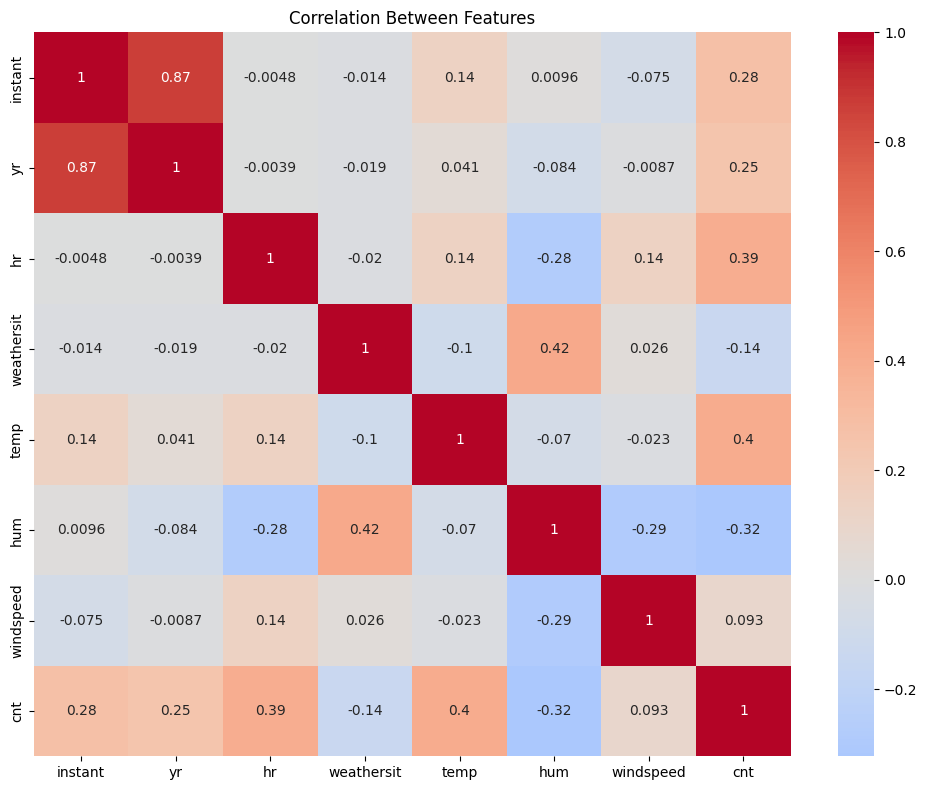

In [23]:
# Full heatmap (excluding target leakage columns)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

In [24]:
x_train = df_cleaned

In [25]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_cleaned.copy()
corrs = df_scaled.corr()['cnt'].abs()

for col in df_scaled.columns:
    if col == 'cnt':
        continue
    scaler = MinMaxScaler()
    df_scaled[col] = scaler.fit_transform(df_scaled[[col]]) * corrs[col]

In [26]:
df_scaled

,instant,yr,hr,weathersit,temp,hum,windspeed,cnt
0,0.000000,0.000000,0.000000,0.000000,0.090867,0.261558,0.000000,16
1,0.000016,0.000000,0.017134,0.000000,0.082607,0.258329,0.000000,40
2,0.000032,0.000000,0.034267,0.000000,0.082607,0.258329,0.000000,32
3,0.000048,0.000000,0.051401,0.000000,0.090867,0.242183,0.000000,13
4,0.000064,0.000000,0.068534,0.000000,0.090867,0.242183,0.000000,1
...,...,...,...,...,...,...,...,...
17374,0.278315,0.250495,0.325537,0.047475,0.099128,0.193746,0.017996,119
17375,0.278331,0.250495,0.342671,0.047475,0.099128,0.193746,0.017996,89
17376,0.278347,0.250495,0.359804,0.000000,0.099128,0.193746,0.017996,90
17377,0.278363,0.250495,0.376938,0.000000,0.099128,0.180830,0.014719,61


In [27]:


from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

X = df_scaled.drop('cnt', axis=1)
y = df_scaled['cnt']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

root_mean_squared_error(y_test, y_pred)


/Users/level3/Desktop/ml-ops-part1/myenv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/Desktop/ml-ops-part1/myenv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/Desktop/ml-ops-part1/myenv/lib/python3.11/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


139.97646352049637

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 78.11137961307263


In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the model
print("starts training")
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ RMSE: {rmse:.2f}")


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/level3/Desktop/ml-ops-part1/myenv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <54A1AE05-1E14-3DA2-A8D0-062134694298> /Users/level3/Desktop/ml-ops-part1/myenv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
